##   Escuela Politécnica Nacional   
## Ingeniería de Ciencias de la Computación   
##  Métodos Numéricos   
### Serie de Taylor y Polinomio de Lagrange
### Aubertin Ochoa          
### 27/11/2024

[Link GITHUB](https://github.com/Auber8a/Metodos-Numericos/blob/e68eb4fabe73cc8f222b0d442bfe8195733f3b40/SerieTaylor_PolLagrange.ipynb) 

## <span style="color:orange"> *Ejercicios Propuestos* </span>
## <span style="color:orange"> *Determine el orden de la mejor aproximación para las siguientes funciones, usando la Serie de Taylor y el Polinomio de Lagrange:* </span>      

## - Escriba las fórmulas de los diferentes polinomios
## - Grafique las diferentes aproximaciones
## <span style="color:orange"> *1. $\frac{1}{25 * x^2 + 1}  , x_0 = 0 $* </span>  


- Polinomio de Taylor:

In [25]:
from sympy import symbols, diff, factorial, simplify

x = symbols('x')
f1 = 1 / (25 * x**2 + 1)  
x0_1 = 0                 

def taylor_polynomial_simplified(f, x0, degree):
    taylor_poly = sum(diff(f, x, i).subs(x, x0) / factorial(i) * (x - x0)**i for i in range(degree + 1))
    return simplify(taylor_poly)

# Calculamos el polinomio de Taylor de grado 6
taylor_poly_f1_degree_6 = taylor_polynomial_simplified(f1, x0_1, 6)
print("Polinomio de Taylor de la primera funcion \n", taylor_poly_f1_degree_6)


Polinomio de Taylor de la primera funcion 
 -15625*x**6 + 625*x**4 - 25*x**2 + 1


- Gráfica de los polinomio de Taylor:

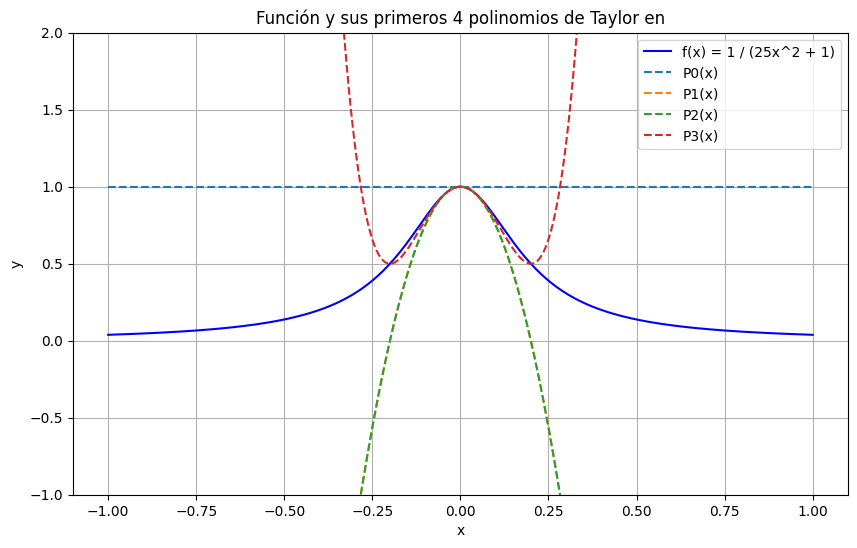

In [ ]:
#Ejercicio 1 grafica de Taylor
import numpy as np
import matplotlib.pyplot as plt

def f(x):
    return 1 / (25 * x**2 + 1)

def P0(x):
    return np.ones_like(x)

def P1(x):
    return 1 - 25 * x**2

def P2(x):
    return 1 - 25 * x**2

def P3(x):
    return 1 - 25 * x**2 + (625 * x**4) / 2

x = np.linspace(-1, 1, 400)
y = f(x)
y_P0 = P0(x)
y_P1 = P1(x)
y_P2 = P2(x)
y_P3 = P3(x)

# Gráficas
plt.figure(figsize=(10, 6))
plt.plot(x, y, label='f(x) = 1 / (25x^2 + 1)', color='blue')
plt.plot(x, y_P0, label='P0(x)', linestyle='--')
plt.plot(x, y_P1, label='P1(x)', linestyle='--')
plt.plot(x, y_P2, label='P2(x)', linestyle='--')
plt.plot(x, y_P3, label='P3(x)', linestyle='--')
plt.title('Función y sus primeros 4 polinomios de Taylor en')
plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.grid(True)
plt.ylim(-1, 2)
plt.show()

- Polinomio de Lagrange:

In [23]:
from typing import Callable
import sympy as sym
from IPython.display import display

def lagrange_approx(*, xs: list[float], ys: list[float]) -> sym.Symbol:
    x = sym.symbols("x")
    lagrange: sym.Symbol = sym.S.Zero

    for i in range(len(xs)):

        term = sym.S.One
        for j in range(len(xs)):
            if i != j:
                term *= (x - xs[j]) / (xs[i] - xs[j])
        term = sym.expand(term)
        lagrange += term * ys[i]

    return lagrange

print("Polinomios de Lagrange de la primera función  ")
lagrange_approx(xs=[0, 0.5, 1,1.5 ], ys=[1, 0.1379, 0.0384, 0.0174])

Polinomios de Lagrange de la primera función  


-0.912133333333333*x**3 + 2.8934*x**2 - 2.94286666666667*x + 1.0

- Gráfica de los polinomio de Lagrange:

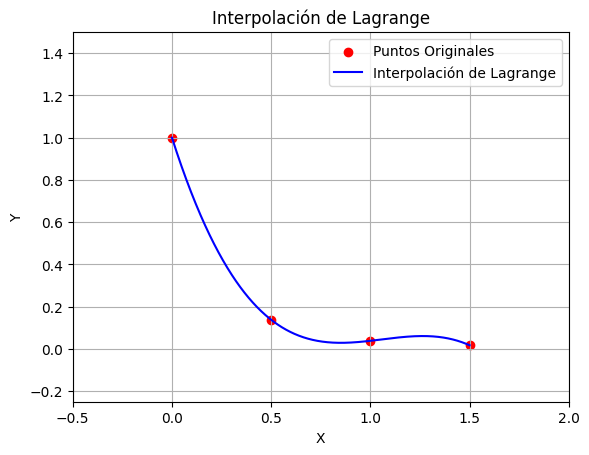

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.interpolate import lagrange

def lagrange_approx(xs, ys):
    poly = lagrange(xs, ys)

    x_interp = np.linspace(min(xs), max(xs), 1000)
    y_interp = poly(x_interp)

    plt.scatter(xs, ys, color='red', label='Puntos Originales')
    plt.plot(x_interp, y_interp, color='blue', label='Interpolación de Lagrange')
    plt.xlabel('X')
    plt.ylabel('Y')
    plt.title('Interpolación de Lagrange')
    plt.xlim([-0.5, 2])  
    plt.ylim([-0.25, 1.5])  
    plt.legend()
    plt.grid(True)
    plt.show()

xs = [0, 0.5, 1, 1.5]
ys = [1, 0.1379, 0.0384, 0.0174]

lagrange_approx(xs, ys)

## <span style="color:orange"> *2. $arctan (x) , x_0 = 1$* </span>  
- Polinomio de Taylor:

In [27]:
from typing import Callable
import sympy as sym
from IPython.display import display

def taylor_approx(fcn: Callable[[float], float], x0: float, n: int) -> sym.Expr:
    x = sym.symbols("x")
    f = sym.Lambda(x, fcn(x))
    taylor = sym.Rational(0)
    for i in range(n + 1):
        term = f(x).diff(x, i).subs(x, x0) / sym.factorial(i) * (x - x0)**i
        taylor += term
        print("\n")
        display(sym.simplify(taylor))
    return taylor

print("Polinomios de Taylor de la función arctan(x) ")
r = taylor_approx(fcn=lambda x: sym.atan(x), x0=1, n=3)

Polinomios de Taylor de la función arctan(x) 




pi/4

x/2 - 1/2 + pi/4

-x**2/4 + x - 3/4 + pi/4

x**3/12 - x**2/2 + 5*x/4 - 5/6 + pi/4

- Gráfica de los polinomios de Taylor:

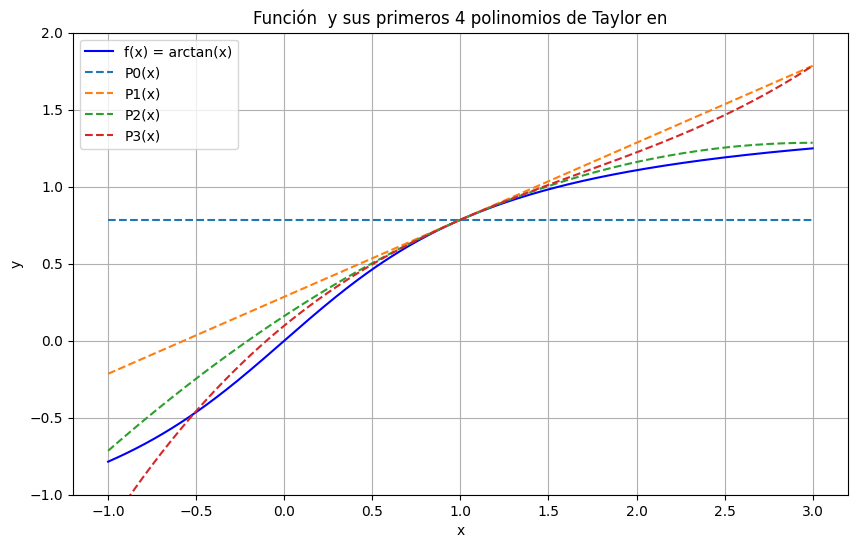

In [14]:
import numpy as np
import matplotlib.pyplot as plt

# Función original
def f(x):
    return np.arctan(x)

# Polinomios de Taylor en x0 = 1
def P0(x):
    return np.arctan(1) * np.ones_like(x)

def P1(x):
    return np.arctan(1) + (1 / 2) * (x - 1)

def P2(x):
    return np.arctan(1) + (1 / 2) * (x - 1) - (1 / 8) * (x - 1)**2

def P3(x):
    return np.arctan(1) + (1 / 2) * (x - 1) - (1 / 8) * (x - 1)**2 + (1 / 16) * (x - 1)**3

# Rango de valores para x
x = np.linspace(-1, 3, 400)
y = f(x)
y_P0 = P0(x)
y_P1 = P1(x)
y_P2 = P2(x)
y_P3 = P3(x)

# Gráficas
plt.figure(figsize=(10, 6))
plt.plot(x, y, label='f(x) = arctan(x)', color='blue')
plt.plot(x, y_P0, label='P0(x)', linestyle='--')
plt.plot(x, y_P1, label='P1(x)', linestyle='--')
plt.plot(x, y_P2, label='P2(x)', linestyle='--')
plt.plot(x, y_P3, label='P3(x)', linestyle='--')
plt.title('Función  y sus primeros 4 polinomios de Taylor en')
plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.grid(True)
plt.ylim(-1, 2)
plt.show()

- Polinomio de Lagrange:

In [22]:
from typing import Callable
import sympy as sym
from IPython.display import display

def lagrange_approx(*, xs: list[float], ys: list[float]) -> sym.Symbol:
    x = sym.symbols("x")
    lagrange: sym.Symbol = sym.S.Zero

    for i in range(len(xs)):

        term = sym.S.One
        for j in range(len(xs)):
            if i != j:
                term *= (x - xs[j]) / (xs[i] - xs[j])
        term = sym.expand(term)
        lagrange += term * ys[i]

    return lagrange

print("Polinomios de Lagrange de la función arctan(x) ")
lagrange_approx(xs=[1, 1.5, 2, 2.5], ys=[0.785, 0.983, 1.107, 1.190])

Polinomios de Lagrange de la función arctan(x) 


0.044*x**3 - 0.345999999999999*x**2 + 1.052*x + 0.0350000000000019

- Gráfica de los polinomios de Lagrange:

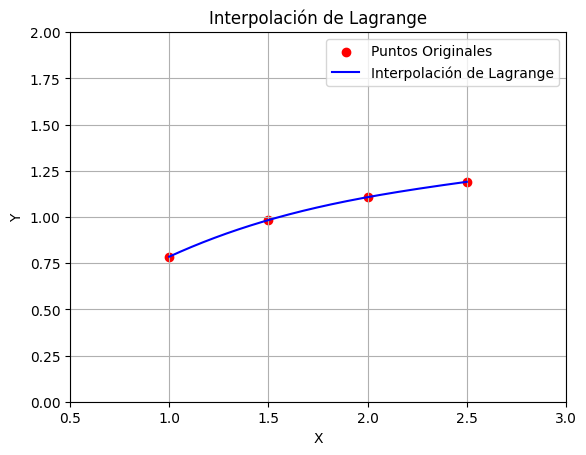

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.interpolate import lagrange

def lagrange_approx(xs, ys):
    poly = lagrange(xs, ys)

    x_interp = np.linspace(min(xs), max(xs), 1000)
    y_interp = poly(x_interp)

    plt.scatter(xs, ys, color='red', label='Puntos Originales')
    plt.plot(x_interp, y_interp, color='blue', label='Interpolación de Lagrange')
    plt.xlabel('X')
    plt.ylabel('Y')
    plt.title('Interpolación de Lagrange')
    plt.xlim([0.5, 3])  
    plt.ylim([0, 2])  
    plt.legend()
    plt.grid(True)
    plt.show()

xs=[1, 1.5, 2, 2.5]
ys=[0.785, 0.983, 1.107, 1.190]

lagrange_approx(xs, ys)